In [59]:
import pandas as pd

#### By default, pandas reads timestamp columns as object / strings into a DataFrame when reading from a CSV file

In [84]:
df = pd.read_csv('apple.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


### see the difference 

In [85]:
df = pd.read_csv('apple.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       504 non-null    datetime64[ns]
 1   Open       504 non-null    float64       
 2   High       504 non-null    float64       
 3   Low        504 non-null    float64       
 4   Close      504 non-null    float64       
 5   Adj Close  504 non-null    float64       
 6   Volume     504 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


In [73]:
# Another method using to_datetime()

df = pd.read_csv('apple.csv')

In [74]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       504 non-null    datetime64[ns]
 1   Open       504 non-null    float64       
 2   High       504 non-null    float64       
 3   Low        504 non-null    float64       
 4   Close      504 non-null    float64       
 5   Adj Close  504 non-null    float64       
 6   Volume     504 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


### creating a range of dates. 2 options is here:
#### define the range of dates with a start and an end date
#### define the range of dates with a start date, a frequency and the number of periods.


In [64]:
#1 
df = pd.date_range(start='2022-02-20', end='2022-10-10')
df

DatetimeIndex(['2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
               '2022-02-28', '2022-03-01',
               ...
               '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
               '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
               '2022-10-09', '2022-10-10'],
              dtype='datetime64[ns]', length=233, freq='D')

In [65]:
#2
df = pd.date_range(start='2022-01-01', freq='D', periods=365)
df

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

### Changing the datetime format

In [86]:
df['new_date'] = df['Date'].dt.strftime('%b %d, %Y')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020"
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020"
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020"
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020"
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020"


### Compose and Decompose Datetime
#### timestamp made up of many things like, date, time, hour, minute etc. I like to show how can I decompose to it's components. Also compose it from different columns containing timestamp components.

In [87]:
df['dates'] = df['Date'].dt.date
df['times'] = df['Date'].dt.time
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020",2020-10-19,00:00:00


In [88]:
df["year"] = df['Date'].dt.year
df["month"] = df['Date'].dt.month
df["day"] = df['Date'].dt.day
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times,year,month,day
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00,2020,10,13
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00,2020,10,14
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00,2020,10,15
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00,2020,10,16
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020",2020-10-19,00:00:00,2020,10,19


### Differencing
#### Differencing means taking the difference between two consecutive values in a time series.

In [92]:
df['Open_diff'] = df['Open'].diff()
df.head(5)

# Here is another method which is opposite of diff names cumsum()

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times,year,month,day,Open_diff
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00,2020,10,13,NaN
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00,2020,10,14,-4.269997
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00,2020,10,15,-2.279999
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00,2020,10,16,2.559998
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020",2020-10-19,00:00:00,2020,10,19,-1.320000


### Rolling Mean

#### .rolling() method, which takes a parameter of the number of values to consider in the rolling window. 

In [94]:
df['High_rolling'] = df['High'].rolling(4).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times,year,month,day,Open_diff,High_rolling
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00,2020,10,13,NaN,NaN
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00,2020,10,14,-4.269997,NaN
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00,2020,10,15,-2.279999,NaN
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00,2020,10,16,2.559998,122.792500
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020",2020-10-19,00:00:00,2020,10,19,-1.320000,121.549999


### Difference between two timestamps

In [95]:
df['time_start'] = df['Date'] - df['Date'].min()
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times,year,month,day,Open_diff,High_rolling,time_start
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00,2020,10,13,NaN,NaN,0 days
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00,2020,10,14,-4.269997,NaN,1 days
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00,2020,10,15,-2.279999,NaN,2 days
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00,2020,10,16,2.559998,122.792500,3 days
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020",2020-10-19,00:00:00,2020,10,19,-1.320000,121.549999,6 days


In [96]:
df["time_difference"] = df["Date"].diff()
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times,year,month,day,Open_diff,High_rolling,time_start,time_difference
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00,2020,10,13,NaN,NaN,0 days,NaT
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00,2020,10,14,-4.269997,NaN,1 days,1 days
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00,2020,10,15,-2.279999,NaN,2 days,1 days
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00,2020,10,16,2.559998,122.792500,3 days,1 days
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,114.596664,120639300,"Oct 19, 2020",2020-10-19,00:00:00,2020,10,19,-1.320000,121.549999,6 days,3 days


### Filter time-series
#### If I want to filter timeseries then I have to set the date column as the index

In [97]:
df = df.set_index(['Date'])

In [101]:
# specific date

df.loc['2020-10-13']

Open                    125.269997
High                    125.389999
Low                     119.650002
Close                   121.099998
Adj Close               119.655579
Volume                   262330500
new_date              Oct 13, 2020
dates                   2020-10-13
times                     00:00:00
year                          2020
month                           10
day                             13
Open_diff                      NaN
High_rolling                   NaN
time_start         0 days 00:00:00
time_difference                NaT
Name: 2020-10-13 00:00:00, dtype: object

In [104]:
# time ranges
df.loc['2020-10-13':'2020-10-16']

,Open,High,Low,Close,Adj Close,Volume,new_date,dates,times,year,month,day,Open_diff,High_rolling,time_start,time_difference
Date,,,,,,,,,,,,,,,,
2020-10-13,125.269997,125.389999,119.650002,121.099998,119.655579,262330500,"Oct 13, 2020",2020-10-13,00:00:00,2020,10,13,NaN,NaN,0 days,NaT
2020-10-14,121.000000,123.029999,119.620003,121.190002,119.744514,150712000,"Oct 14, 2020",2020-10-14,00:00:00,2020,10,14,-4.269997,NaN,1 days,1 days
2020-10-15,118.720001,121.199997,118.150002,120.709999,119.270233,112559200,"Oct 15, 2020",2020-10-15,00:00:00,2020,10,15,-2.279999,NaN,2 days,1 days
2020-10-16,121.279999,121.550003,118.809998,119.019997,117.600380,115393800,"Oct 16, 2020",2020-10-16,00:00:00,2020,10,16,2.559998,122.7925,3 days,1 days


### Resampling 
#### Resampling can provide additional information on the data. Resampling is 2 types

In [106]:
# Downsampling
# Downsampling is when the frequency of samples is decreased

downsample = df['Open'].resample('M').mean()
downsample.head(5)

Date
2020-10-31    117.208571
2020-11-30    116.748501
2020-12-31    127.150455
2021-01-31    133.101053
2021-02-28    132.022631
Freq: M, Name: Open, dtype: float64

In [108]:
# Upsampling
# Upsampling is when the frequency of samples is increased

upsampling = df['Open'].resample('D').interpolate(method='linear')
upsampling

Date
2020-10-13    125.269997
2020-10-14    121.000000
2020-10-15    118.720001
2020-10-16    121.279999
2020-10-17    120.839999
                 ...    
2022-10-08    141.833328
2022-10-09    141.126663
2022-10-10    140.419998
2022-10-11    139.899994
2022-10-12    139.130005
Freq: D, Name: Open, Length: 730, dtype: float64

### Plot Timeseries

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Open'>

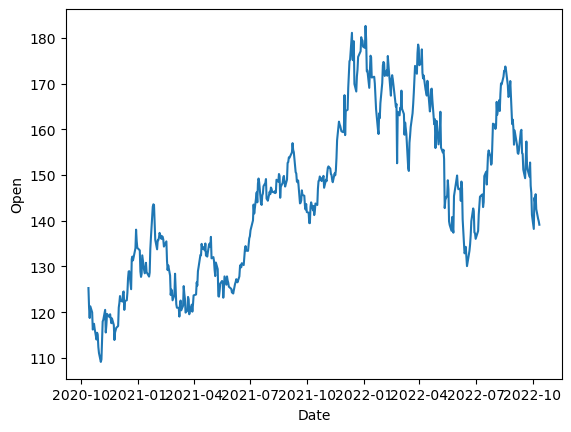

In [111]:
sns.lineplot(data=df, x='Date', y='Open')

### Sometimes time series data can be categorical, e.g., tracking occurrences of different events.
### Before plotting the data, you can label encode the categorical columns, e.g., by using the LabelEncoder

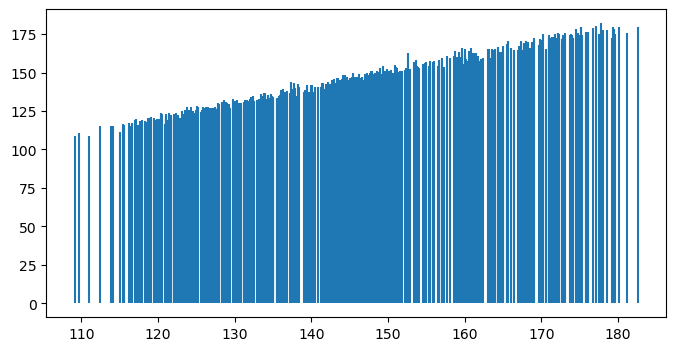

In [116]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(df["Open"], 0, df["Close"])
plt.show()

In [118]:
# I can set limits 
import numpy as np

ax.set_xlim(np.array(["2020-04-01", "2020-04-30"],dtype="datetime64"))

(18353.0, 18382.0)